# Домашняя работа "Работа с переменными"

Потренируем навыки, полученные на практическом занятии. Пользуясь новыми знаниями, проведите эксплоративный анализ данных на данных недвижимости Бостона, и попытайтесь обучить линейную модель наиболее качественно. Все ваши действия и решения описывайте в markdown.
Данные вы сможете получить исполнив следующий код:

```python
from sklearn.datasets import load_boston
import pandas

data = pandas.read_csv(load_boston()['filename'], skiprows=1)

# Переменная, которую надо предсказать - ’MEDV’.
# Прочитать информацию о содержимом датасета:
print(load_boston()['DESCR'])
```

In [1]:
from sklearn.datasets import load_boston

print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Решение

In [2]:
import pandas
import numpy
import seaborn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [3]:
def get_boston_data():
    return pandas.read_csv(load_boston()['filename'], skiprows=1)

boston_data = get_boston_data()
x_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
y_column = 'MEDV'

In [4]:
def print_error_regression(X, y):
    model = LinearRegression()
    hw_reg = model.fit(X, y)
    pred_values = hw_reg.predict(X)
    print('Error: {:.4f}'.format(mean_absolute_error(pred_values, y)))
    
def print_score(X,y, random_seed=42, model=None):
    if model is None:
        model = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed )  
    model.fit(X_train, y_train)
    
    print('score', model.score(X_test, y_test))

#### Смотрим показатели модели без обработки данных

In [5]:
print_error_regression(
    X=boston_data[x_columns], 
    y=boston_data[y_column])

print_score(boston_data[x_columns], boston_data[y_column])

Error: 3.2709
score 0.7112260057484874


#### Делаем поверхностный анализ данных

In [6]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


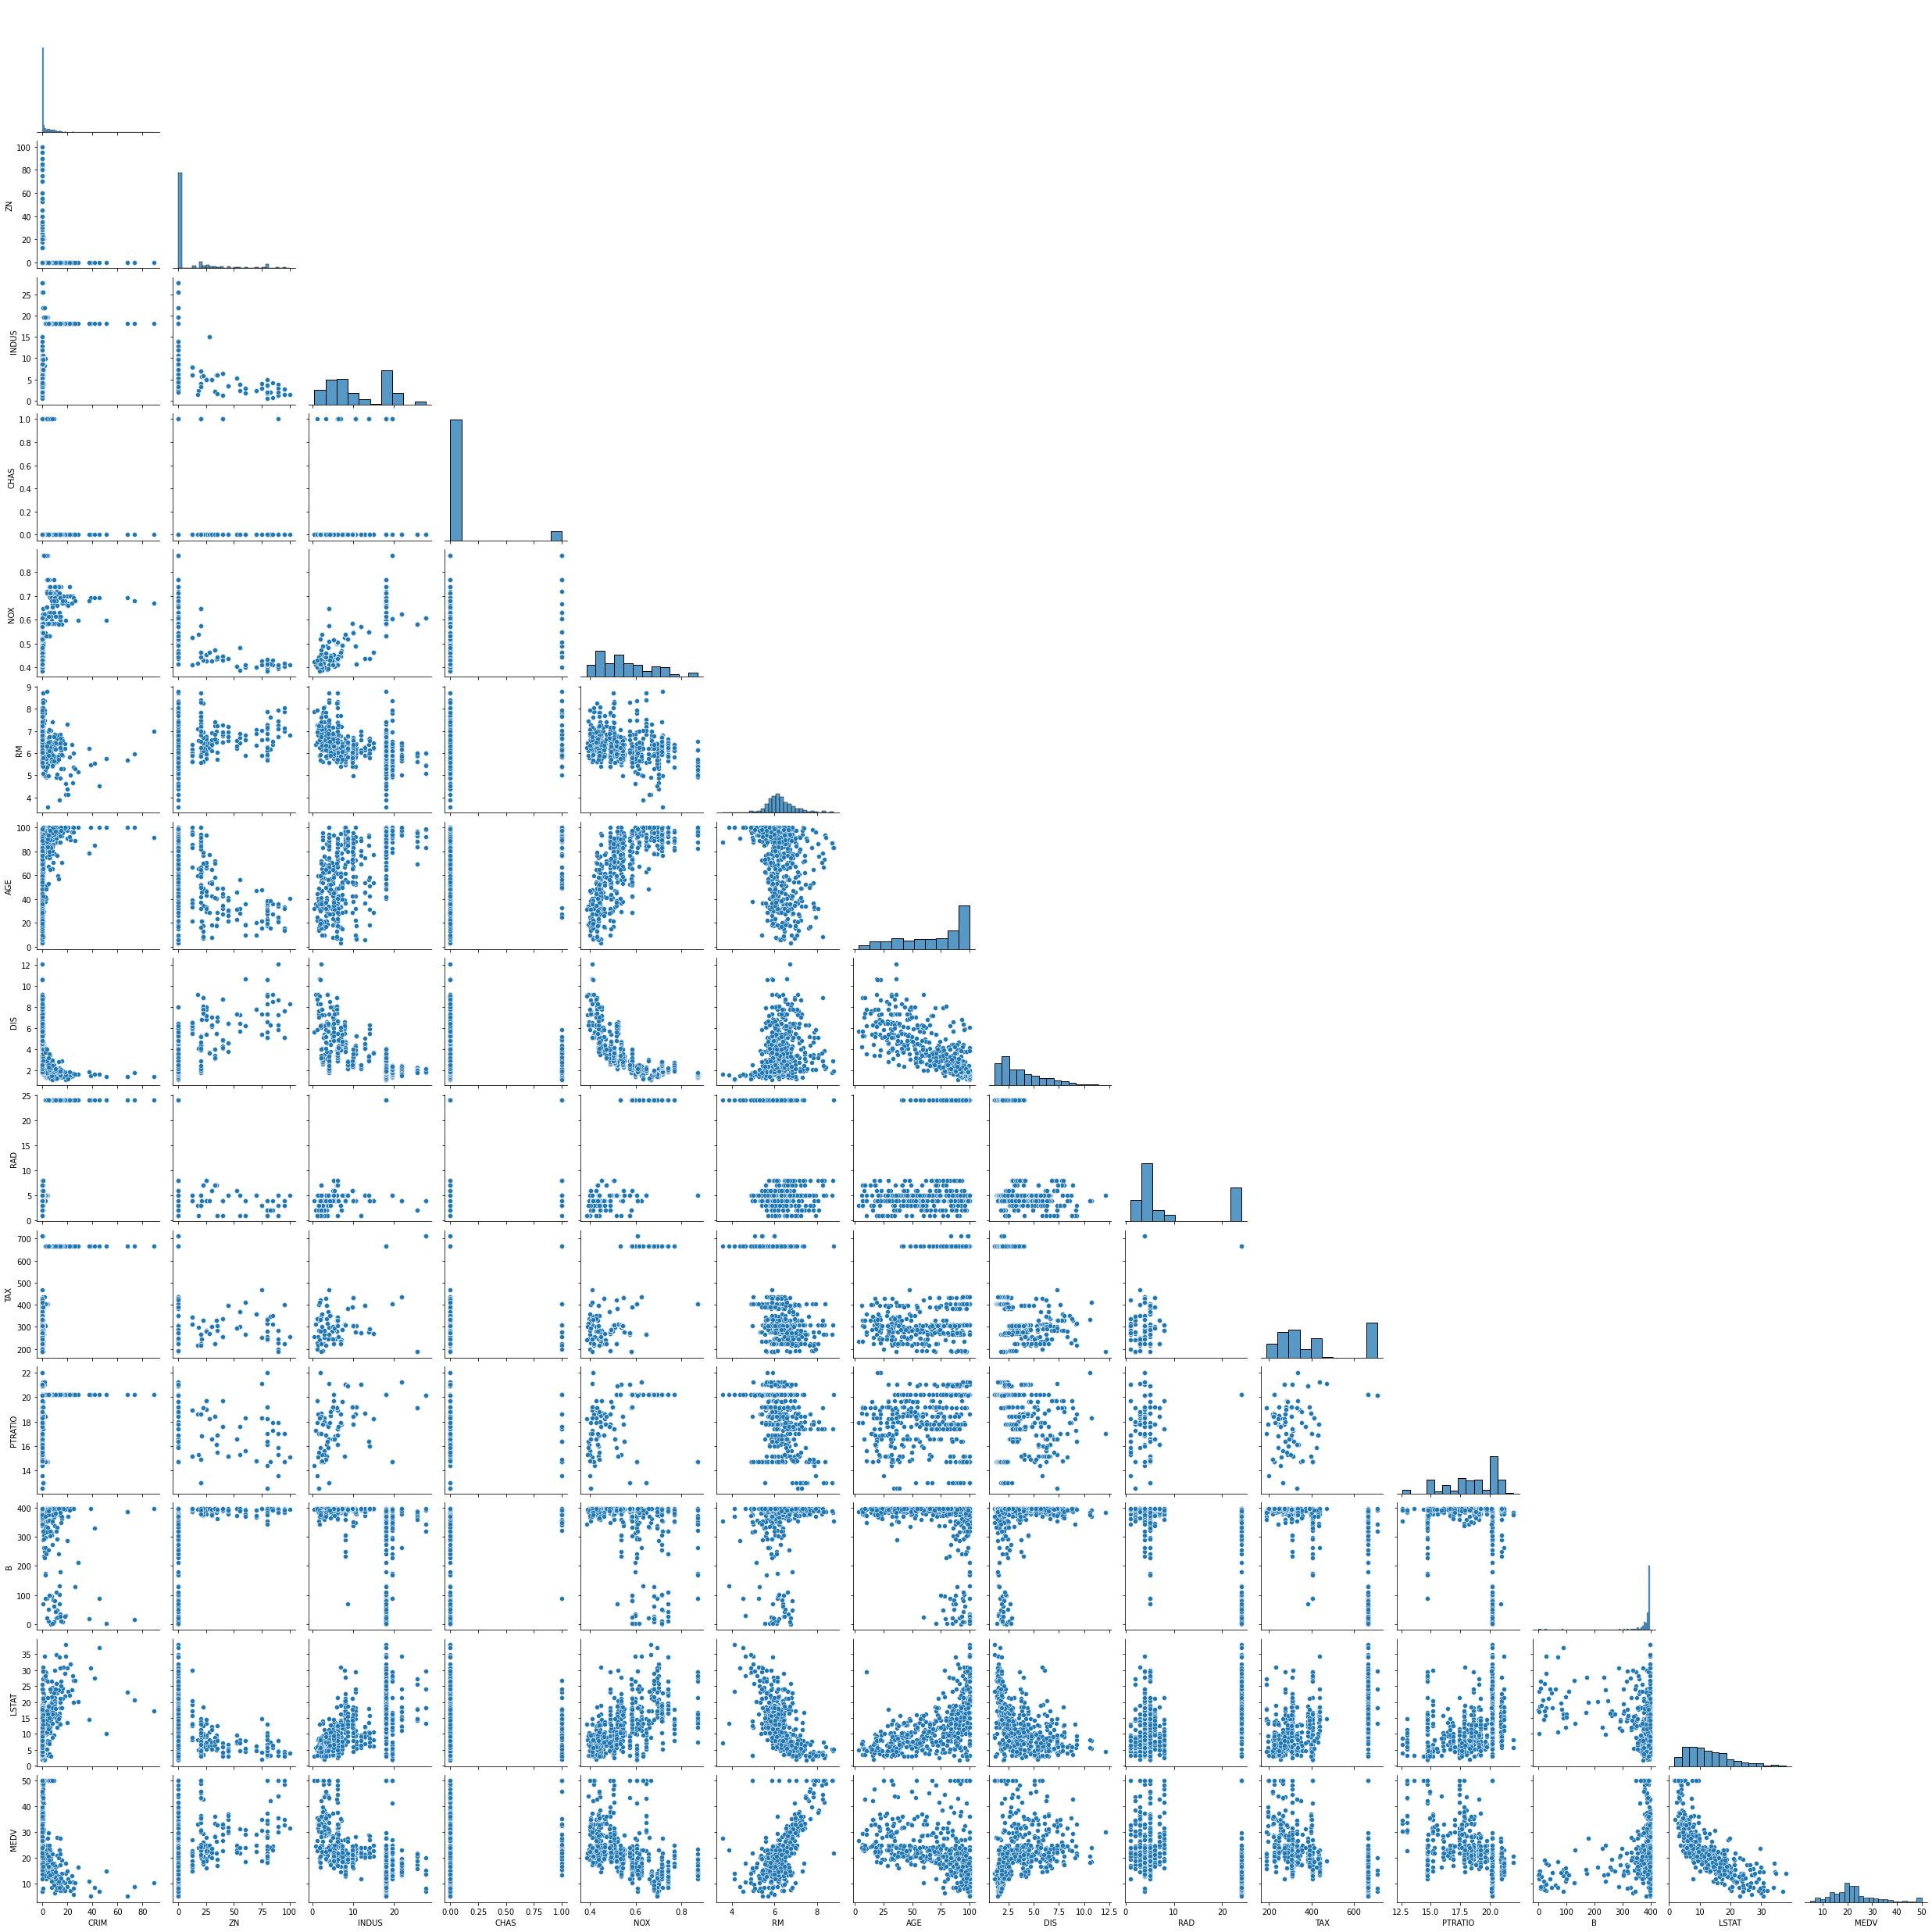

In [9]:
seaborn.pairplot(
    boston_data, 
    corner=True)

#### Смотри выборосы

In [10]:
def trimm_data(data, column_name, min_quantile=None, max_quantile=None):
    if min_quantile is None and max_quantile is None:
        return data
    
    elif max_quantile is None:
        return data.loc[data[column_name] >= data[column_name].quantile(min_quantile)]
    
    elif min_quantile is None:
        return data.loc[data[column_name] <= data[column_name].quantile(max_quantile)]

    return data.loc[
        (data[column_name] > data[column_name].quantile(min_quantile))
        & (data[column_name] < data[column_name].quantile(max_quantile))
    ]

#### Убираем выбросы у 'CRIM'

<AxesSubplot:xlabel='CRIM'>

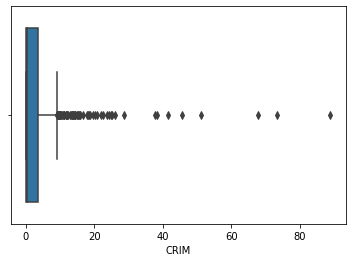

In [11]:
seaborn.boxplot(x=boston_data['CRIM'])

<AxesSubplot:xlabel='CRIM'>

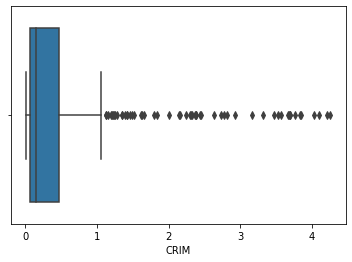

In [12]:
boston_data = trimm_data(boston_data, 'CRIM', max_quantile=0.77)
seaborn.boxplot(x=boston_data['CRIM'])

#### Убираем выбросы у 'B'

<AxesSubplot:xlabel='B'>

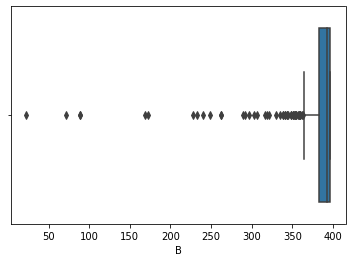

In [13]:
seaborn.boxplot(x=boston_data['B'])

<AxesSubplot:xlabel='B'>

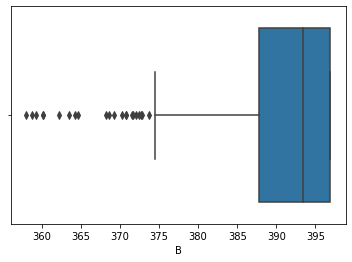

In [14]:
boston_data = trimm_data(boston_data, 'B', min_quantile=0.1)
seaborn.boxplot(x=boston_data['B'])

### Смотрим как повлияло на ошибки

In [15]:
print_error_regression(
    X=boston_data[x_columns], 
    y=boston_data[y_column])
print_score(boston_data[x_columns], boston_data[y_column])

Error: 2.3380
score 0.8796223399599662


Улучшели показател на ~16.8% (было ~0.7112, стало ~0.8796)